# Econ 320 – Homework 2  
## Questions 1–3: Medicare Advantage Markets (2014–2019)

GitHub repository: https://github.com/CarsonSleeman/Homework-2-


In [ ]:
import os
import pandas as pd

# ----------------------------
# 1) LANDSCAPE (2014–2019)
# ----------------------------
landscape_path = "../ma-data/ma/landscape/Extracted Data"

files = sorted([
    f for f in os.listdir(landscape_path)
    if f.endswith(".csv")
    and f.startswith(tuple(str(y) for y in range(2014, 2020)))
    and "LandscapeSource file MA" in f
    and ("AtoM" in f or "NtoW" in f)
    and "Sanction" not in f
])

def read_landscape_file(path, year):
    raw = pd.read_csv(path, encoding="latin1", header=None, low_memory=False)
    header_idx = raw.index[raw.iloc[:, 0].astype(str).str.strip().eq("State")][0]
    df = raw.iloc[header_idx:].copy()
    df.columns = df.iloc[0].astype(str).str.strip()
    df = df.iloc[1:].copy()
    df["year"] = year
    df = df.drop(columns=["nan"], errors="ignore")
    return df

landscape_dfs = []
for f in files:
    year = int(f[:4])
    landscape_dfs.append(read_landscape_file(os.path.join(landscape_path, f), year))

landscape = pd.concat(landscape_dfs, ignore_index=True, sort=False)

# Clean ID types
landscape["Contract ID"] = landscape["Contract ID"].astype(str).str.strip()

# ----------------------------
# 2) SERVICE AREA (Jan files, 2014–2019)
# ----------------------------
sa_path = "../ma-data/ma/service-area/Extracted Data"

sa_files = sorted([
    f for f in os.listdir(sa_path)
    if f.startswith("MA_Cnty_SA_")
    and f.endswith("_01.csv")
    and any(f"_{y}_" in f for y in range(2014, 2020))
])

sa_dfs = []
for f in sa_files:
    df = pd.read_csv(os.path.join(sa_path, f), low_memory=False)
    df["year"] = int(f.split("_")[3])  # MA_Cnty_SA_YYYY_MM.csv
    df["Contract ID"] = df["Contract ID"].astype(str).str.strip()
    sa_dfs.append(df)

service_area = pd.concat(sa_dfs, ignore_index=True)

# ----------------------------
# 3) MERGE (Contract ID + year), for Q1 counts
# ----------------------------
merged = landscape.merge(
    service_area[["Contract ID", "FIPS", "year"]],
    on=["Contract ID", "year"],
    how="inner"
)

print("landscape:", landscape.shape)
print("service_area:", service_area.shape)
print("merged:", merged.shape)

merged.head()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


QUESTION 1

In [4]:
import os
os.listdir("../ma-data")



['jhr-data', 'ma', 'ffs-costs']

In [5]:
os.listdir("../ma-data/ma")


['cms-payment',
 'enrollment',
 'landscape',
 'service-area',
 'star-ratings',
 'benchmarks',
 'penetration']

In [7]:
import os
os.listdir("../ma-data/ma/landscape")[:30]


['2019-MA-Landscape-Source-Files-v-10-12-18.zip',
 '2022 MA Landscape Source Files (v 10 26 21).zip',
 '2016-MA-Landscape-Source-Files-v-04-22-16.zip',
 '2020 Plan and Premium Information for Medicare Plans Offering Part D Coverage (v9 03 19).zip',
 '2023 Plan and Premium Information for Medicare Plans Offering Part D Coverage (v 10 14 2022).zip',
 'Extracted Data',
 '2019-Plan-and-Premium-Information-for-Medicare-Plans-Offering-Part-D-Coverage-v10-12-18.zip',
 '2006-2012-Plan-and-Premium-Information-for-Medicare-Plans-Offering-Part-D- (1).zip',
 '2015-Landscape-and-Plan-and-Premium-Files-For-Medicare-Plans-Offering-Part-D-Coverage.zip',
 '2013-Landscape-and-Plan-and-Premium-Files.zip',
 '2017-Plan-and-Premium-Information-for-Medicare-Plans-Offering-Part-D-Coverage-v4-10-18-16.zip',
 '2018-MA-Landscape-Source-Files-v-10-14-17.zip',
 '2023 MA Landscape Source File (v 10 14 2022).zip',
 '2015-MA-Landscape-Source-FIles-v-11-04-14.zip',
 '2013-Landscape-and-Plan-and-Premium-Files-For-Medic

In [8]:
os.listdir("../ma-data/ma/service-area")[:30]


['MA_Cnty_SA_2023_08.zip',
 'MA-Cnty-SA-2008-03.zip',
 'MA-Cnty-SA-2009-05.zip',
 'MA_Cnty_SA_2020_12_0.zip',
 'MA-Cnty-SA-2010-10.zip',
 'ma_cnty_sa_2024_09.zip',
 'MA-Cnty-SA-2006-11.zip',
 'MA_Cnty_SA_2021_02.zip',
 'MA-Cnty-SA-2008-04.zip',
 'MA-Cnty-SA-2006-12.zip',
 'MA_Cnty_SA_2024_08.zip',
 'MA-Cnty-SA-2008-12.zip',
 'MA-Cnty-SA-2013-03.zip',
 'MA-Cnty-SA-2011-04.zip',
 'MA_Cnty_SA_2019_01.zip',
 'MA_Cnty_SA_2020_02.zip',
 'MA-Cnty-SA-2016-11.zip',
 'MA-Cnty-SA-2009-10.zip',
 'MA-Cnty-SA-2012-11.zip',
 'MA-Cnty-SA-2009-02.zip',
 'MA_Cnty_SA_2019_12.zip',
 'MA-Cnty-SA-2010-05.zip',
 'ma_cnty_sa_2024_11.zip',
 'MA_Cnty_SA_2024_06.zip',
 'MA-Cnty-SA-2017-08.zip',
 'MA_Cnty_SA_2019_04.zip',
 'MA_Cnty_SA_2021_04.zip',
 'MA-Cnty-SA-2011-11.zip',
 'MA_Cnty_SA_2022_06.zip',
 'MA-Cnty-SA-2016-04.zip']

In [9]:
os.listdir("../ma-data/ma/landscape/Extracted Data")


['2018LandscapeSource file MA_AtoM 10142017.csv',
 '2009LandscapeSourceData_SNP_11_05_08.xls',
 '2010LandscapeSourceData_MA_12_01_09.xls',
 'CY2024_Landscape_MA_sanctioned_20240628.csv',
 '2021LandscapeSource file MA_AtoM 10152020.csv',
 '2021LandscapeSource file MA_Sanctioned 10152020.csv',
 '2019LandscapeSource file MA_NtoW 10122018.csv',
 '2009LandscapeSourceData_PDP_11_03_08.csv',
 '2019LandscapeSource file MA 10122018.xls',
 '2016LandscapeSource file MA_NtoW 04222016.csv',
 '2008LandscapeSourceData_MA_09_25_07(A-M).csv',
 '2015LandscapeSource file MA 11042014.xls',
 '2014LandscapeSource file MA_sanctioned 05292014.csv',
 '2010LandscapeSourceData_SNP_11_20_09.csv',
 '2009LandscapeSourceData_MA_11_05_08_A_to_M.csv',
 '2017LandscapeSource file MA_AtoM 10182016.csv',
 '2016LandscapeSource file MA_AtoM 04222016.csv',
 '2008LandscapeSourceData_PDP_09_25_07.xls',
 '2017LandscapeSource file MA_NtoW 10182016.csv',
 '2020LandscapeSource file MA_AtoM 10152019.csv',
 '2018LandscapeSource file

In [10]:
os.listdir("../ma-data/ma/service-area/Extracted Data")


['MA_Cnty_SA_2011_07.csv',
 'MA_Cnty_SA_2020_07.csv',
 'MA_Cnty_SA_2015_06.csv',
 'MA_Cnty_SA_2022_03.csv',
 'MA_Cnty_SA_2023_02.csv',
 'MA_Cnty_SA_2023_01.csv',
 'MA_Cnty_SA_2022_01.csv',
 'Read_Me_MA_Cnty_SA_2021.txt',
 'MA_Cnty_SA_2015_09.csv',
 'MA_Cnty_SA_2024_09.csv',
 'MA_Cnty_SA_2023_06.csv',
 'MA_Cnty_SA_2015_10.csv',
 'MA_Cnty_SA_2009_06.csv',
 'MA_Cnty_SA_2010_02.csv',
 'MA_Cnty_SA_2018_10.csv',
 'MA_Cnty_SA_2021_11.csv',
 'MA_Cnty_SA_2020_09.csv',
 'Read_Me_MA_Cnty_SA_2018.txt',
 'MA_Cnty_SA_2013_02.csv',
 'MA_Cnty_SA_200805.csv',
 'MA_Cnty_SA_2018_07.csv',
 'MA_Cnty_SA_2018_09.csv',
 'MA_Cnty_SA_2021_09.csv',
 'MA_Cnty_SA_2020_08.csv',
 'MA_Cnty_SA_2020_10.csv',
 'Read_Me_MA_Cnty_SA_2023.txt',
 'Read_Me_MA_Cnty_SA_2024.txt',
 'MA_Cnty_SA_2016_01.csv',
 'MA_Cnty_SA_2009_12.csv',
 'MA_Cnty_SA_2011_10.csv',
 'MA_Cnty_SA_2016_07.csv',
 'MA_Cnty_SA_2013_07.csv',
 'MA_Cnty_SA_2024_08.csv',
 'MA_Cnty_SA_2017_02.csv',
 'MA_Cnty_SA_2014_02.csv',
 'MA_Cnty_SA_2019_03.csv',
 'MA_Cnty

In [11]:
os.listdir("../ma-data/ma/landscape/Extracted Data")


['2018LandscapeSource file MA_AtoM 10142017.csv',
 '2009LandscapeSourceData_SNP_11_05_08.xls',
 '2010LandscapeSourceData_MA_12_01_09.xls',
 'CY2024_Landscape_MA_sanctioned_20240628.csv',
 '2021LandscapeSource file MA_AtoM 10152020.csv',
 '2021LandscapeSource file MA_Sanctioned 10152020.csv',
 '2019LandscapeSource file MA_NtoW 10122018.csv',
 '2009LandscapeSourceData_PDP_11_03_08.csv',
 '2019LandscapeSource file MA 10122018.xls',
 '2016LandscapeSource file MA_NtoW 04222016.csv',
 '2008LandscapeSourceData_MA_09_25_07(A-M).csv',
 '2015LandscapeSource file MA 11042014.xls',
 '2014LandscapeSource file MA_sanctioned 05292014.csv',
 '2010LandscapeSourceData_SNP_11_20_09.csv',
 '2009LandscapeSourceData_MA_11_05_08_A_to_M.csv',
 '2017LandscapeSource file MA_AtoM 10182016.csv',
 '2016LandscapeSource file MA_AtoM 04222016.csv',
 '2008LandscapeSourceData_PDP_09_25_07.xls',
 '2017LandscapeSource file MA_NtoW 10182016.csv',
 '2020LandscapeSource file MA_AtoM 10152019.csv',
 '2018LandscapeSource file

In [12]:
os.listdir("../ma-data/ma/service-area/Extracted Data")


['MA_Cnty_SA_2011_07.csv',
 'MA_Cnty_SA_2020_07.csv',
 'MA_Cnty_SA_2015_06.csv',
 'MA_Cnty_SA_2022_03.csv',
 'MA_Cnty_SA_2023_02.csv',
 'MA_Cnty_SA_2023_01.csv',
 'MA_Cnty_SA_2022_01.csv',
 'Read_Me_MA_Cnty_SA_2021.txt',
 'MA_Cnty_SA_2015_09.csv',
 'MA_Cnty_SA_2024_09.csv',
 'MA_Cnty_SA_2023_06.csv',
 'MA_Cnty_SA_2015_10.csv',
 'MA_Cnty_SA_2009_06.csv',
 'MA_Cnty_SA_2010_02.csv',
 'MA_Cnty_SA_2018_10.csv',
 'MA_Cnty_SA_2021_11.csv',
 'MA_Cnty_SA_2020_09.csv',
 'Read_Me_MA_Cnty_SA_2018.txt',
 'MA_Cnty_SA_2013_02.csv',
 'MA_Cnty_SA_200805.csv',
 'MA_Cnty_SA_2018_07.csv',
 'MA_Cnty_SA_2018_09.csv',
 'MA_Cnty_SA_2021_09.csv',
 'MA_Cnty_SA_2020_08.csv',
 'MA_Cnty_SA_2020_10.csv',
 'Read_Me_MA_Cnty_SA_2023.txt',
 'Read_Me_MA_Cnty_SA_2024.txt',
 'MA_Cnty_SA_2016_01.csv',
 'MA_Cnty_SA_2009_12.csv',
 'MA_Cnty_SA_2011_10.csv',
 'MA_Cnty_SA_2016_07.csv',
 'MA_Cnty_SA_2013_07.csv',
 'MA_Cnty_SA_2024_08.csv',
 'MA_Cnty_SA_2017_02.csv',
 'MA_Cnty_SA_2014_02.csv',
 'MA_Cnty_SA_2019_03.csv',
 'MA_Cnty

In [17]:
import os
import pandas as pd

landscape_path = "../ma-data/ma/landscape/Extracted Data"

files = [
    f for f in os.listdir(landscape_path)
    if f.endswith(".csv")
    and "LandscapeSource file MA" in f          # only source files
    and any(str(y) in f for y in range(2014, 2020))
    and "Sanction" not in f
]
files

['2018LandscapeSource file MA_AtoM 10142017.csv',
 '2019LandscapeSource file MA_NtoW 10122018.csv',
 '2016LandscapeSource file MA_NtoW 04222016.csv',
 '2014LandscapeSource file MA_sanctioned 05292014.csv',
 '2017LandscapeSource file MA_AtoM 10182016.csv',
 '2016LandscapeSource file MA_AtoM 04222016.csv',
 '2017LandscapeSource file MA_NtoW 10182016.csv',
 '2020LandscapeSource file MA_AtoM 10152019.csv',
 '2019LandscapeSource file MA_AtoM 10122018.csv',
 '2018LandscapeSource file MA_NtoW 10142017.csv',
 '2015LandscapeSource file MA_sanctioned 11042014.csv',
 '2015LandscapeSource file MA_NtoW 11042014.csv',
 '2015LandscapeSource file MA_AtoM 11042014.csv',
 '2014LandscapeSource file MA_AtoM 05292014.csv',
 '2014LandscapeSource file MA_NtoW 05292014.csv',
 '2020LandscapeSource file MA_NtoW 10152019.csv']

In [18]:
landscape_dfs = []

for f in files:
    df = pd.read_csv(
        os.path.join(landscape_path, f),
        encoding="latin1",      # key fix
        low_memory=False
    )
    df["year"] = int([y for y in range(2014, 2020) if str(y) in f][0])
    landscape_dfs.append(df)

landscape = pd.concat(landscape_dfs, ignore_index=True)
landscape.head()


,"2018 Medicare Advantage, and Cost Plans",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,year,"2019 Medicare Advantage, and Cost Plans","2016 Medicare Advantage, and Cost Plans","2014 Medicare Advantage, and Cost Plans","2017 Medicare Advantage, and Cost Plans","2020 Medicare Advantage, and Cost Plans","2015 Medicare Advantage, and Cost Plans"
0,"Data as of September 5, 2017. Includes 2018 a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,NaN,NaN
1,Notes: Data are subject to change as contracts...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,NaN,NaN
2,* Indicates plan does not offer Part D drug co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,NaN,NaN
3,** MOOP is defined as: Maximum Out-of-Pocket (...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,NaN,NaN
4,State,County,Organization Name,Plan Name,Type of Medicare Health Plan,Monthly Consolidated Premium \n(Includes \nPar...,Annual Drug Deductible,Drug \nBenefit \nType,\nAdditional Coverage Offered in the Gap,Drug Benefit Type Detail,...,In-network MOOP Amount **,Overall Star Rating,NaN,2017,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
landscape.columns


Index(['2018 Medicare Advantage, and Cost Plans', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'year',
       '2019 Medicare Advantage, and Cost Plans',
       '2016 Medicare Advantage, and Cost Plans',
       '2014 Medicare Advantage, and Cost Plans',
       '2017 Medicare Advantage, and Cost Plans',
       '2020 Medicare Advantage, and Cost Plans',
       '2015 Medicare Advantage, and Cost Plans'],
      dtype='object')

In [30]:
import os
import pandas as pd

def read_landscape_file(path, year):
    raw = pd.read_csv(path, encoding="latin1", header=None, low_memory=False)

    # Find the header row where the first column equals "State"
    header_idx = raw.index[raw.iloc[:, 0].astype(str).str.strip().eq("State")][0]

    df = raw.iloc[header_idx:].copy()
    df.columns = df.iloc[0].astype(str).str.strip()
    df = df.iloc[1:].copy()

    df["year"] = year
    return df

landscape_path = "../ma-data/ma/landscape/Extracted Data"

# IMPORTANT: make sure files is your correct list of 2014–2019 LandscapeSource file MA AtoM/NtoW csvs
landscape_dfs = []
for f in files:
    year = int(f[:4])
    df = read_landscape_file(os.path.join(landscape_path, f), year)
    landscape_dfs.append(df)

landscape = pd.concat(landscape_dfs, ignore_index=True, sort=False)

print(landscape.shape)
print(landscape.columns.tolist()[:25])
landscape.head()



(395548, 20)
['State', 'County', 'Organization Name', 'Plan Name', 'Type of Medicare Health Plan', 'Monthly Consolidated Premium', 'Annual Drug Deductible', 'Drug Benefit Type', 'Type of Additional Coverage Offered in the Gap', 'Drug Benefit Type Detail', 'Contract ID', 'Plan ID', 'Segment ID', 'In-network MOOP Amount **', 'Overall Star Rating', 'year', 'Additional Coverage Offered in the Gap', 'Monthly Consolidated Premium \n(Includes \nPart C + D)', 'Drug \nBenefit \nType', 'nan']


5,State,County,Organization Name,Plan Name,Type of Medicare Health Plan,Monthly Consolidated Premium,Annual Drug Deductible,Drug Benefit Type,Type of Additional Coverage Offered in the Gap,Drug Benefit Type Detail,Contract ID,Plan ID,Segment ID,In-network MOOP Amount **,Overall Star Rating,year,Additional Coverage Offered in the Gap,Monthly Consolidated Premium \n(Includes \nPart C + D),Drug \nBenefit \nType,nan
0,Alabama,Autauga,Blue Advantage (PPO),Blue Advantage Premier (PPO),Local PPO,$202.00,$-,Enhanced,No Gap Coverage,EA,H0104,10,3,"$3,400",3 stars,2014,NaN,NaN,NaN,NaN
1,Alabama,Autauga,Blue Advantage (PPO),Blue Advantage Complete (PPO),Local PPO,$72.00,$250.00,Basic,No Gap Coverage,BA,H0104,11,5,"$3,400",3 stars,2014,NaN,NaN,NaN,NaN
2,Alabama,Autauga,Cigna-HealthSpring,Cigna-HealthSpring Preferred (HMO),Local HMO,$-,$-,Enhanced,Many Generics,EA,H0150,1,0,"$6,700",3.5 stars,2014,NaN,NaN,NaN,NaN
3,Alabama,Autauga,Cigna-HealthSpring,Cigna-HealthSpring Advantage (HMO),Local HMO *,$-,NaN,NaN,NaN,NaN,H0150,12,0,"$6,700",3.5 stars,2014,NaN,NaN,NaN,NaN
4,Alabama,Autauga,UnitedHealthcare,AARP MedicareComplete Plan 1 (HMO),Local HMO,$-,$-,Enhanced,No Gap Coverage,EA,H0151,1,0,"$4,900",3 stars,2014,NaN,NaN,NaN,NaN


In [29]:
landscape_dfs = []

for f in files:
    raw = pd.read_csv(
        os.path.join(landscape_path, f),
        encoding="latin1",
        header=None,
        skiprows=4,
        low_memory=False
    )

    # Use first row as header
    header = raw.iloc[0].astype(str).str.strip()

    df = raw.iloc[1:].copy()
    df.columns = header

    # Drop completely empty column names (like "nan")
    df = df.loc[:, ~df.columns.isna()]
    df = df.loc[:, df.columns.astype(str) != "nan"]


    # Make column names unique (adds .1, .2, etc if duplicated)
    df.columns = pd.Index(df.columns).astype(str)
    df = df.loc[:, ~df.columns.duplicated()]

    df["year"] = int(f[:4])
    landscape_dfs.append(df)

landscape = pd.concat(landscape_dfs, ignore_index=True, sort=False)

print(landscape.shape)
print(landscape.columns.tolist()[:30])
landscape.head()



(395560, 2)
['** MOOP is defined as: Maximum Out-of-Pocket (MOOP) limit on enrollee spending that includes costs for all in-network Part A and Part B Services. N/A is defined as Not Applicable', 'year']


,** MOOP is defined as: Maximum Out-of-Pocket (MOOP) limit on enrollee spending that includes costs for all in-network Part A and Part B Services. N/A is defined as Not Applicable,year
0,State,2014
1,Alabama,2014
2,Alabama,2014
3,Alabama,2014
4,Alabama,2014


In [31]:
landscape[["Contract ID", "Plan ID", "State", "County", "year"]].head()


5,Contract ID,Plan ID,State,County,year
0,H0104,10,Alabama,Autauga,2014
1,H0104,11,Alabama,Autauga,2014
2,H0150,1,Alabama,Autauga,2014
3,H0150,12,Alabama,Autauga,2014
4,H0151,1,Alabama,Autauga,2014


In [32]:
# drop junk columns
landscape = landscape.drop(columns=["nan"], errors="ignore")

# standardize IDs
landscape["Contract ID"] = landscape["Contract ID"].astype(str).str.strip()
landscape["Plan ID"] = landscape["Plan ID"].astype(str).str.strip().str.zfill(3)

# create full plan identifier used in service-area files
landscape["plan_id"] = landscape["Contract ID"] + "-" + landscape["Plan ID"]

landscape[["plan_id", "Contract ID", "Plan ID", "year"]].head()


5,plan_id,Contract ID,Plan ID,year
0,H0104-010,H0104,010,2014
1,H0104-011,H0104,011,2014
2,H0150-001,H0150,001,2014
3,H0150-012,H0150,012,2014
4,H0151-001,H0151,001,2014


In [33]:
import os
import pandas as pd

sa_path = "../ma-data/ma/service-area/Extracted Data"

sa_files = sorted([
    f for f in os.listdir(sa_path)
    if f.startswith("MA_Cnty_SA_")
    and f.endswith("_01.csv")
    and any(f"_{y}_" in f for y in range(2014, 2020))
])

print(*sa_files, sep="\n")


MA_Cnty_SA_2014_01.csv
MA_Cnty_SA_2015_01.csv
MA_Cnty_SA_2016_01.csv
MA_Cnty_SA_2017_01.csv
MA_Cnty_SA_2018_01.csv
MA_Cnty_SA_2019_01.csv


In [34]:
sa_dfs = []
for f in sa_files:
    df = pd.read_csv(os.path.join(sa_path, f), low_memory=False)
    df["year"] = int(f.split("_")[3])  # MA_Cnty_SA_YYYY_MM.csv
    sa_dfs.append(df)

service_area = pd.concat(sa_dfs, ignore_index=True)

service_area.columns


Index(['Contract ID', 'Organization Name', 'Organization Type', 'Plan Type',
       'Partial', 'EGHP', 'SSA', 'FIPS', 'County', 'State', 'Notes', 'year'],
      dtype='object')

In [36]:
plan_col = "Contract ID"
fips_col = "FIPS"

service_area[[plan_col, fips_col, "year"]].head()



,Contract ID,FIPS,year
0,90091,NaN,2014
1,H0028,15003.0,2014
2,H0028,15007.0,2014
3,H0028,15009.0,2014
4,H0028,19103.0,2014


In [2]:
import os
import pandas as pd

landscape_path = "../ma-data/ma/landscape/Extracted Data"
sa_path = "../ma-data/ma/service-area/Extracted Data"


In [3]:
year = 2018

files_2018 = sorted([
    f for f in os.listdir(landscape_path)
    if f.startswith(str(year))
    and f.endswith(".csv")
    and "LandscapeSource file MA" in f
    and ("AtoM" in f or "NtoW" in f)
    and "Sanction" not in f
])

files_2018


['2018LandscapeSource file MA_AtoM 10142017.csv',
 '2018LandscapeSource file MA_NtoW 10142017.csv']

In [4]:
def read_landscape_file(path, year):
    raw = pd.read_csv(path, encoding="latin1", header=None, low_memory=False)
    header_idx = raw.index[raw.iloc[:, 0].astype(str).str.strip().eq("State")][0]
    df = raw.iloc[header_idx:].copy()
    df.columns = df.iloc[0].astype(str).str.strip()
    df = df.iloc[1:].copy()
    df["year"] = year
    return df


In [5]:
landscape_2018 = pd.concat(
    [read_landscape_file(os.path.join(landscape_path, f), 2018) for f in files_2018],
    ignore_index=True,
    sort=False
)

landscape_2018 = landscape_2018.drop(columns=["nan"], errors="ignore")
landscape_2018["Contract ID"] = landscape_2018["Contract ID"].astype(str).str.strip()

landscape_2018[["Contract ID", "Plan ID", "State", "County", "year"]].head()


5,Contract ID,Plan ID,State,County,year
0,H0104,012,Alabama,Autauga,2018
1,H0104,015,Alabama,Autauga,2018
2,H0150,012,Alabama,Autauga,2018
3,H0150,024,Alabama,Autauga,2018
4,H0154,008,Alabama,Autauga,2018


In [6]:
sa_file_2018 = "MA_Cnty_SA_2018_01.csv"
service_area_2018 = pd.read_csv(os.path.join(sa_path, sa_file_2018), low_memory=False)

service_area_2018["year"] = 2018
service_area_2018["Contract ID"] = service_area_2018["Contract ID"].astype(str).str.strip()

service_area_2018[["Contract ID", "FIPS", "County", "State", "year"]].head()


,Contract ID,FIPS,County,State,year
0,90091,NaN,NaN,NaN,2018
1,H0022,39023.0,Clark,OH,2018
2,H0022,39035.0,Cuyahoga,OH,2018
3,H0022,39051.0,Fulton,OH,2018
4,H0022,39055.0,Geauga,OH,2018


In [7]:
merged_2018 = landscape_2018.merge(
    service_area_2018[["Contract ID", "FIPS", "year"]],
    on=["Contract ID", "year"],
    how="inner"
)

county_counts_2018 = (
    merged_2018.groupby(["year", "FIPS"])["Contract ID"]
    .nunique()
    .reset_index(name="num_plans")
)

county_counts_2018.describe()


,year,FIPS,num_plans
count,3313.0,3313.000000,3313.000000
mean,2018.0,31842.605795,94.841232
std,0.0,16322.505412,11.550332
min,2018.0,1001.000000,1.000000
25%,2018.0,19081.000000,95.000000
50%,2018.0,31007.000000,97.000000
75%,2018.0,46093.000000,99.000000
max,2018.0,78030.000000,112.000000


<Figure size 600x400 with 0 Axes>

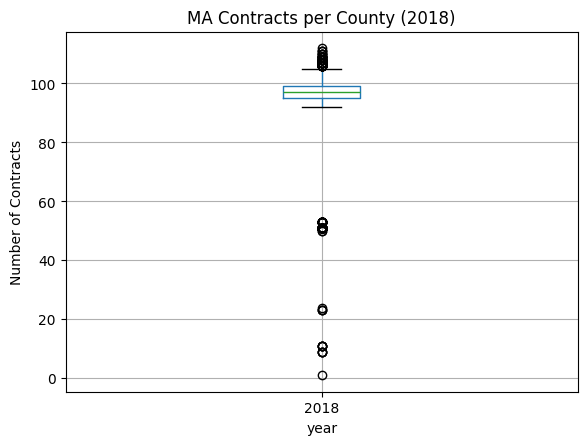

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
county_counts_2018.boxplot(column="num_plans", by="year")
plt.suptitle("")
plt.title("MA Contracts per County (2018)")
plt.ylabel("Number of Contracts")
plt.show()


In [9]:
import matplotlib.pyplot as plt

def county_counts_for_year(y):
    # landscape files for year y
    year_files = sorted([
        f for f in os.listdir(landscape_path)
        if f.startswith(str(y))
        and f.endswith(".csv")
        and "LandscapeSource file MA" in f
        and ("AtoM" in f or "NtoW" in f)
        and "Sanction" not in f
    ])

    # load landscape for year y (only)
    land_y = pd.concat(
        [read_landscape_file(os.path.join(landscape_path, f), y) for f in year_files],
        ignore_index=True,
        sort=False
    )
    land_y = land_y.drop(columns=["nan"], errors="ignore")
    land_y["Contract ID"] = land_y["Contract ID"].astype(str).str.strip()

    # load service area for Jan of year y
    sa_file = f"MA_Cnty_SA_{y}_01.csv"
    sa_y = pd.read_csv(os.path.join(sa_path, sa_file), low_memory=False)
    sa_y["year"] = y
    sa_y["Contract ID"] = sa_y["Contract ID"].astype(str).str.strip()

    # merge (contract-year) then count unique contracts by county
    merged_y = land_y.merge(
        sa_y[["Contract ID", "FIPS", "year"]],
        on=["Contract ID", "year"],
        how="inner"
    )

    counts_y = (
        merged_y.groupby(["year", "FIPS"])["Contract ID"]
        .nunique()
        .reset_index(name="num_plans")
    )
    return counts_y


In [ ]:
all_counts = []
for y in range(2014, 2020):
    print("Working on", y)
    all_counts.append(county_counts_for_year(y))

county_counts = pd.concat(all_counts, ignore_index=True)
county_counts.head(), county_counts.shape


Working on 2014
Working on 2015
Working on 2016


In [4]:
import os
import pandas as pd

# paths relative to notebooks/
landscape_path = "../ma-data/ma/landscape/Extracted Data"
sa_path = "../ma-data/ma/service-area/Extracted Data"

# sanity check
print(len(os.listdir(landscape_path)), "landscape files")
print(len(os.listdir(sa_path)), "service area files")


75 landscape files
237 service area files


In [5]:
def contracts_from_landscape_file(path):
    raw = pd.read_csv(path, encoding="latin1", header=None, low_memory=False)

    header_idx = raw.index[
        raw.iloc[:, 0].astype(str).str.strip().eq("State")
    ][0]

    df = raw.iloc[header_idx:].copy()
    df.columns = df.iloc[0].astype(str).str.strip()

    return df["Contract ID"].astype(str).str.strip()


In [6]:
def county_counts_for_year_light(y):
    year_files = sorted([
        f for f in os.listdir(landscape_path)
        if f.startswith(str(y))
        and f.endswith(".csv")
        and "LandscapeSource file MA" in f
        and ("AtoM" in f or "NtoW" in f)
        and "Sanction" not in f
    ])

    contracts = pd.concat(
        [contracts_from_landscape_file(os.path.join(landscape_path, f))
         for f in year_files],
        ignore_index=True
    ).dropna().unique()

    contracts_df = pd.DataFrame({"Contract ID": contracts})
    contracts_df["year"] = y

    sa_file = f"MA_Cnty_SA_{y}_01.csv"
    sa_y = pd.read_csv(os.path.join(sa_path, sa_file), low_memory=False)
    sa_y["year"] = y
    sa_y["Contract ID"] = sa_y["Contract ID"].astype(str).str.strip()

    merged = contracts_df.merge(
        sa_y[["Contract ID", "FIPS", "year"]],
        on=["Contract ID", "year"],
        how="inner"
    )

    return (
        merged.groupby(["year", "FIPS"])["Contract ID"]
        .nunique()
        .reset_index(name="num_plans")
    )


In [7]:
all_counts = []

for y in range(2014, 2020):
    print("Working on", y)
    counts_y = county_counts_for_year_light(y)
    all_counts.append(counts_y)

county_counts = pd.concat(all_counts, ignore_index=True)
county_counts.head(), county_counts.shape


Working on 2014
Working on 2015
Working on 2016
Working on 2017
Working on 2018
Working on 2019


(   year    FIPS  num_plans
 0  2014  1001.0        121
 1  2014  1003.0        122
 2  2014  1005.0        119
 3  2014  1007.0        121
 4  2014  1009.0        120,
 (19870, 3))

<Figure size 900x500 with 0 Axes>

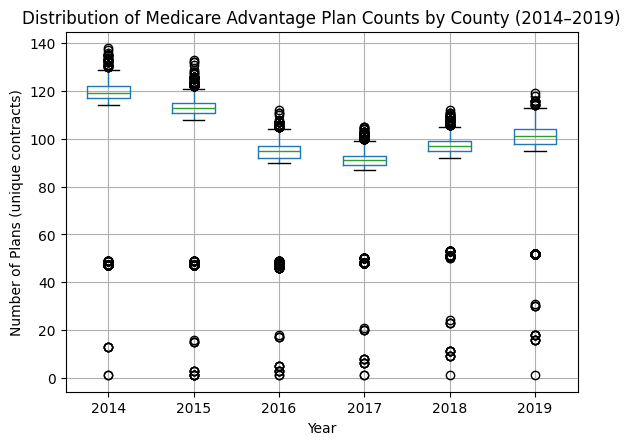

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
county_counts.boxplot(column="num_plans", by="year")
plt.suptitle("")
plt.title("Distribution of Medicare Advantage Plan Counts by County (2014–2019)")
plt.xlabel("Year")
plt.ylabel("Number of Plans (unique contracts)")
plt.show()


In [9]:
summary = county_counts.groupby("year")["num_plans"].describe()
summary


,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2014,3305.0,116.185477,16.345795,1.0,117.0,119.0,122.0,138.0
2015,3313.0,109.907938,15.863443,1.0,111.0,113.0,115.0,133.0
2016,3313.0,92.495321,11.971990,1.0,92.0,95.0,97.0,112.0
2017,3313.0,89.152128,10.893525,1.0,89.0,91.0,93.0,105.0
2018,3313.0,94.841232,11.550332,1.0,95.0,97.0,99.0,112.0
2019,3313.0,98.876245,12.281364,1.0,98.0,101.0,104.0,119.0


Plan availability fell from 2014 to 2017 and then rose again through 2019. While many counties have plenty of plans, some have very few, meaning choice is not evenly distributed.

In [11]:
import os

pay_path = "../ma-data/ma/cms-payment"
os.listdir(pay_path)


['2016paymentdata.zip',
 '2016',
 '2013paymentdata.zip',
 '2023_plan_payment.zip',
 '2008paymentdata.zip',
 '2023',
 '2007paymentdata-.zip',
 'plan-payment-puf-2022_0.zip',
 '2006',
 '2019paymentdata_0.zip',
 '2013',
 '2009paymentdata-.zip',
 '2012',
 '2019',
 '2017paymentdata.zip',
 '2008',
 '2010paymentdata-.zip',
 '2009',
 '2015-payment-data.zip',
 '2012paymentdata.zip',
 '2022',
 '2007',
 '2018',
 '2010',
 '2015',
 '2018paymentdata.zip',
 '2021Paymentdata_1_0.zip',
 '2011paymentdata.zip',
 '2014paymentdata.zip',
 '2011',
 '2006paymentdata-.zip',
 '2021',
 '2017',
 '2020Paymentdata_1_0.zip',
 '2014',
 '2020']

In [15]:
import os

print("2014 files:")
print(os.listdir("../ma-data/ma/cms-payment/2014"))

print("\n2018 files:")
print(os.listdir("../ma-data/ma/cms-payment/2018"))


2014 files:
['2014PartDPlans.xlsx', 'RDS PUF 2014 data.xlsx', 'Plan Payment Data Elements.pdf', '2014PartCCountyLevel.xlsx', '2014PartDReconciliation.xlsx', '2014PartCPlan Level.xlsx']

2018 files:
['2018PartDPlans.xlsx', 'RDS PUF 2018 data.xlsx', 'Plan Payment Data Elements.pdf', '2018PartCCountyLevel.xlsx', '2018PartDReconciliation.xlsx', '2018PartCPlanLevel.xlsx']


In [16]:
import pandas as pd
import os

pay_dfs = []

for year in [2014, 2018]:
    year_path = f"../ma-data/ma/cms-payment/{year}"
    files = [f for f in os.listdir(year_path) if f.endswith(".csv")]

    df = pd.read_csv(os.path.join(year_path, files[0]), low_memory=False)
    df["year"] = year
    pay_dfs.append(df)

payments = pd.concat(pay_dfs, ignore_index=True)
payments.columns


IndexError: list index out of range

In [18]:
import os

print("2014 contents:")
print(os.listdir("../ma-data/ma/cms-payment/2014"))

print("\n2018 contents:")
print(os.listdir("../ma-data/ma/cms-payment/2018"))


2014 contents:
['2014PartDPlans.xlsx', 'RDS PUF 2014 data.xlsx', 'Plan Payment Data Elements.pdf', '2014PartCCountyLevel.xlsx', '2014PartDReconciliation.xlsx', '2014PartCPlan Level.xlsx']

2018 contents:
['2018PartDPlans.xlsx', 'RDS PUF 2018 data.xlsx', 'Plan Payment Data Elements.pdf', '2018PartCCountyLevel.xlsx', '2018PartDReconciliation.xlsx', '2018PartCPlanLevel.xlsx']


In [1]:
import pandas as pd

p2014 = pd.read_excel(
    "../ma-data/ma/cms-payment/2014/2014PartCPlan Level.xlsx"
)
p2014["year"] = 2014

p2018 = pd.read_excel(
    "../ma-data/ma/cms-payment/2018/2018PartCPlanLevel.xlsx"
)
p2018["year"] = 2018

payments = pd.concat([p2014, p2018], ignore_index=True)
payments.columns


Index(['Plan Level Average Per Member Per Month (PM/PM) Payment for 2014',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'year'],
      dtype='object')

In [21]:
!pip install openpyxl



[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
payments.columns


Index(['Plan Level Average Per Member Per Month (PM/PM) Payment for 2014',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'year'],
      dtype='object')

In [3]:
payments = payments.rename(columns={
    payments.columns[0]: "pmpm_payment"
})


In [7]:
payments = payments[
    (payments["pmpm_payment"] > 0) & (payments["pmpm_payment"] < 2000)
]


In [9]:
payments["pmpm_payment"] = (
    payments["pmpm_payment"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)

payments["pmpm_payment"] = pd.to_numeric(
    payments["pmpm_payment"], errors="coerce"
)


In [8]:
payments.groupby("year")["pmpm_payment"].describe()


,count,mean,std,min,25%,50%,75%,max


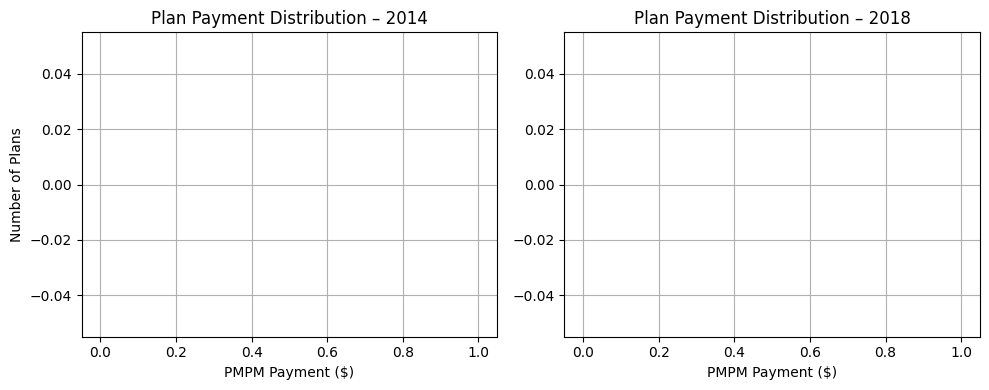

In [12]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
payments.loc[payments.year == 2014, "pmpm_payment"].hist(bins=40)
plt.title("Plan Payment Distribution – 2014")
plt.xlabel("PMPM Payment ($)")
plt.ylabel("Number of Plans")

plt.subplot(1,2,2)
payments.loc[payments.year == 2018, "pmpm_payment"].hist(bins=40)
plt.title("Plan Payment Distribution – 2018")
plt.xlabel("PMPM Payment ($)")

plt.tight_layout()
plt.show()


In [11]:
import matplotlib.pyplot as plt


In [13]:
payments.groupby("year")["pmpm_payment"].count()


Series([], Name: pmpm_payment, dtype: int64)

In [14]:
import pandas as pd

xls_2014 = pd.ExcelFile("../ma-data/ma/cms-payment/2014/2014PartCPlan Level.xlsx")
xls_2014.sheet_names


['result.srx', 'Sheet2', 'Sheet3']

In [15]:
xls_2018 = pd.ExcelFile("../ma-data/ma/cms-payment/2018/2018PartCPlanLevel.xlsx")
xls_2018.sheet_names


['Sheet1', 'result.srx']

In [16]:
p2014 = pd.read_excel(
    "../ma-data/ma/cms-payment/2014/2014PartCPlan Level.xlsx",
    sheet_name="Sheet2"
)
p2014["year"] = 2014
p2014.head()



,year


In [17]:
p2018 = pd.read_excel(
    "../ma-data/ma/cms-payment/2018/2018PartCPlanLevel.xlsx",
    sheet_name="Sheet1"
)
p2018["year"] = 2018
p2018.head()

,year


In [18]:
p2014_raw = pd.read_excel(
    "../ma-data/ma/cms-payment/2014/2014PartCPlan Level.xlsx",
    sheet_name="Sheet2",
    header=None
)

p2014_raw.head(10)


""


In [19]:
p2018_raw = pd.read_excel(
    "../ma-data/ma/cms-payment/2018/2018PartCPlanLevel.xlsx",
    sheet_name="Sheet1",
    header=None
)

p2018_raw.head(10)

""


In [20]:
p2014_raw.iloc[:15, :15]


""


In [21]:
p2018_raw.iloc[:15, :15]


""


In [22]:
import pandas as pd

xls = pd.ExcelFile("../ma-data/ma/cms-payment/2014/2014PartCPlan Level.xlsx")
xls.sheet_names


['result.srx', 'Sheet2', 'Sheet3']

In [23]:
for s in xls.sheet_names:
    df = pd.read_excel(
        "../ma-data/ma/cms-payment/2014/2014PartCPlan Level.xlsx",
        sheet_name=s,
        header=None
    )
    print(s, df.applymap(lambda x: isinstance(x, (int, float))).sum().sum())

result.srx 11313
Sheet2 0.0
Sheet3 0.0


/tmp/ipykernel_2367745/638733010.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(s, df.applymap(lambda x: isinstance(x, (int, float))).sum().sum())
/tmp/ipykernel_2367745/638733010.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(s, df.applymap(lambda x: isinstance(x, (int, float))).sum().sum())
/tmp/ipykernel_2367745/638733010.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(s, df.applymap(lambda x: isinstance(x, (int, float))).sum().sum())


In [24]:
p2014 = pd.read_excel(
    "../ma-data/ma/cms-payment/2014/2014PartCPlan Level.xlsx",
    sheet_name="result.srx"
)

p2014.head()

,Plan Level Average Per Member Per Month (PM/PM) Payment for 2014,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Contract Number,Plan Benefit\nPackage,Contract Name,Plan Type,Average Part\nRisk Score,Average A/B PM/PM\nPayment,Average Rebate PM/PM\nPayment
2,H0028,1,"CHA HMO, INC.",HMO,0.834,685.75,44.35
3,H0028,2,"CHA HMO, INC.",HMO,0.924,744.91,49.83
4,H0028,3,"CHA HMO, INC.",HMO,0.921,778.05,30.69


In [25]:
p2014.columns


Index(['Plan Level Average Per Member Per Month (PM/PM) Payment for 2014',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

In [26]:
p2014 = p2014.rename(columns={
    "Plan Level Average Per Member Per Month (PM/PM) Payment for 2014": "pmpm_payment"
})

In [27]:
p2014 = p2014[["pmpm_payment"]]
p2014["year"] = 2014

In [28]:
p2014["pmpm_payment"] = pd.to_numeric(p2014["pmpm_payment"], errors="coerce")


In [29]:
p2014["pmpm_payment"].describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: pmpm_payment, dtype: float64

In [30]:
p2014_raw.iloc[:15, :8]


""


In [32]:
p2014 = pd.read_excel(
    "../ma-data/ma/cms-payment/2014/2014PartCPlan Level.xlsx",
    sheet_name="result.srx"
)


In [33]:
p2014 = p2014.rename(columns={
    "Average A/B PM/PM\nPayment": "pmpm_payment"
})

In [34]:
p2014.columns

Index(['Plan Level Average Per Member Per Month (PM/PM) Payment for 2014',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

In [35]:
p2014 = pd.read_excel(
    "../ma-data/ma/cms-payment/2014/2014PartCPlan Level.xlsx",
    sheet_name="result.srx",
    skiprows=1
)

In [36]:
p2014.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

In [40]:
p2014 = pd.read_excel(
    "../ma-data/ma/cms-payment/2014/2014PartCPlan Level.xlsx",
    sheet_name="result.srx",
    header=2
)

In [41]:
p2014.columns

Index(['Contract Number', 'Plan Benefit\nPackage', 'Contract Name',
       'Plan Type', 'Average Part\nRisk Score', 'Average A/B PM/PM\nPayment',
       'Average Rebate PM/PM\nPayment'],
      dtype='object')

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

p2014 = pd.read_excel(
    "../ma-data/ma/cms-payment/2014/2014PartCPlan Level.xlsx",
    skiprows=2
)

p2014 = p2014[[
    "Contract Number",
    "Average A/B PM/PM\nPayment",
    "Average Rebate PM/PM\nPayment"
]].copy()

p2014.columns = ["contract", "ab_pmpm", "rebate_pmpm"]
p2014["year"] = 2014

In [44]:
for df in [p2014, p2018]:
    df["bid"] = df["ab_pmpm"] - df["rebate_pmpm"]

KeyError: 'ab_pmpm'

In [45]:
print(p2014.columns.tolist())


['contract', 'ab_pmpm', 'rebate_pmpm', 'year', 'bid']


KeyError: 'bid'

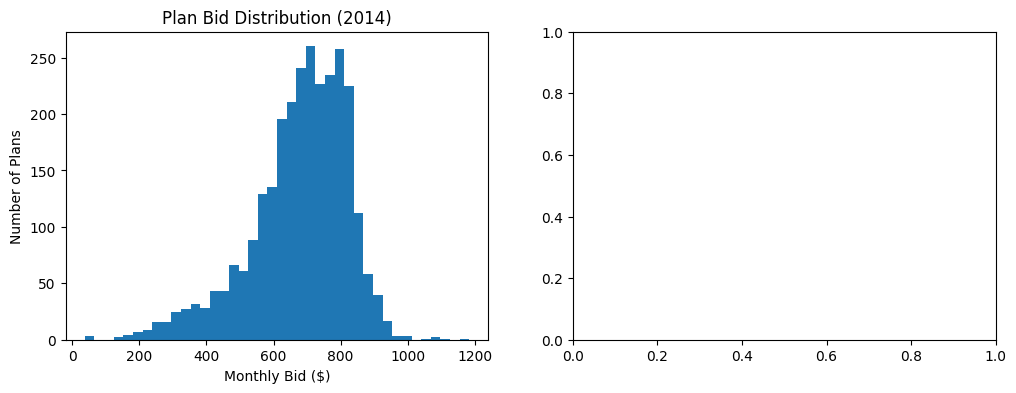

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(p2014["bid"].dropna(), bins=40)
plt.title("Plan Bid Distribution (2014)")
plt.xlabel("Monthly Bid ($)")
plt.ylabel("Number of Plans")

plt.subplot(1,2,2)
plt.hist(p2018["bid"].dropna(), bins=40)
plt.title("Plan Bid Distribution (2018)")
plt.xlabel("Monthly Bid ($)")

plt.tight_layout()
plt.show()


In [47]:
print(p2018.columns.tolist())


['year']


In [48]:
p2018 = pd.read_excel(
    "../ma-data/ma/cms-payment/2018/2018PartCPlanLevel.xlsx",
    skiprows=2
)

p2018 = p2018[[
    "Contract Number",
    "Average A/B PM/PM\nPayment",
    "Average Rebate PM/PM\nPayment"
]].copy()

p2018.columns = ["contract", "ab_pmpm", "rebate_pmpm"]
p2018["year"] = 2018

KeyError: "None of [Index(['Contract Number', 'Average A/B PM/PM\\nPayment',\n       'Average Rebate PM/PM\\nPayment'],\n      dtype='object')] are in the [columns]"

In [50]:
print(p2018.columns.tolist())


[]


In [52]:
p2018_raw = pd.read_excel(
    "../ma-data/ma/cms-payment/2018/2018PartCPlanLevel.xlsx",
    header=None
)

p2018_raw.head(10)


""


In [54]:
p2018_raw = pd.read_excel(
    "../ma-data/ma/cms-payment/2018/2018PartCPlanLevel.xlsx",
    header=None
)

In [55]:
header_row = p2018_raw[p2018_raw.apply(
    lambda row: row.astype(str).str.contains("Contract Number").any(),
    axis=1
)].index[0]

header_row

IndexError: index 0 is out of bounds for axis 0 with size 0

In [56]:
header_row = p2018_raw[p2018_raw.apply(
    lambda row: row.astype(str).str.contains("Contract", case=False).any(),
    axis=1
)].index[0]

header_row

IndexError: index 0 is out of bounds for axis 0 with size 0

In [57]:
xls = pd.ExcelFile("../ma-data/ma/cms-payment/2018/2018PartCPlanLevel.xlsx")
xls.sheet_names

['Sheet1', 'result.srx']

In [58]:
p2018 = pd.read_excel(
    "../ma-data/ma/cms-payment/2018/2018PartCPlanLevel.xlsx",
    sheet_name="result.srx",
    skiprows=2
)

In [59]:
p2018.columns.tolist()


['Contract Number',
 'Plan Benefit\nPackage',
 'Contract Name',
 'Plan Type',
 'Average Part C Risk Score',
 'Average A/B PM/PM Payment',
 'Average Rebate PM/PM Payment']

In [60]:
p2018 = p2018[[
    "Contract Number",
    "Average A/B PM/PM Payment",
    "Average Rebate PM/PM Payment"
]].copy()

p2018.columns = ["contract", "ab_pmpm", "rebate_pmpm"]
p2018["year"] = 2018

In [61]:
p2018.head()


,contract,ab_pmpm,rebate_pmpm,year
0,H0028,663.33,65.05,2018
1,H0028,814.22,31.04,2018
2,H0028,691.00,85.80,2018
3,H0028,790.18,16.56,2018
4,H0029,737.61,76.88,2018


In [62]:
p2018["bid"] = p2018["ab_pmpm"] - p2018["rebate_pmpm"]


In [63]:
p2018["bid"].describe()


count    3129.000000
mean      674.954797
std       138.175605
min        86.350000
25%       602.500000
50%       683.450000
75%       777.140000
max       980.210000
Name: bid, dtype: float64

QUESTION 2

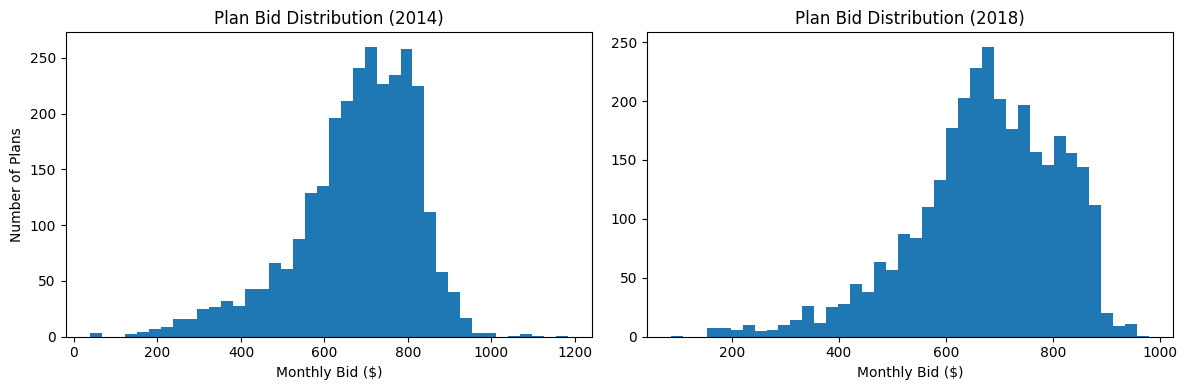

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(p2014["bid"].dropna(), bins=40)
plt.title("Plan Bid Distribution (2014)")
plt.xlabel("Monthly Bid ($)")
plt.ylabel("Number of Plans")

plt.subplot(1,2,2)
plt.hist(p2018["bid"].dropna(), bins=40)
plt.title("Plan Bid Distribution (2018)")
plt.xlabel("Monthly Bid ($)")

plt.tight_layout()
plt.show()

Interpretation: The histograms show that in 2014, Medicare Advantage plan bids were more tightly clustered around a lower central value. By 2018, the distribution shifts to the right and becomes more spread out, indicating higher average bids and greater variation across plans. This suggests that plan costs increased over time and that differences between plans became larger.